In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
### Transmission and Coupling equations for
### circular waveguide coupler according to (1) and (2) of
### https://opg.optica.org/directpdfaccess/45cdb5d6-73dd-4d89-bbe68b128695d1ae_196150/oe-18-5-5151.pdf?da=1&id=196150&seq=0&mobile=no

def S21(a, K1, K2, alpha, R, n, wavelength):
    sigma = a ** 2 * np.exp(-alpha * 2 * np.pi * R)
    beta = n * 2 * np.pi / wavelength
    G = sigma * np.sqrt((1 - K1) * (1 - K2))
    return a * (np.sqrt(1 - K1) - sigma * np.sqrt(1 - K2) * np.exp(-1J * 2 * np.pi * beta * R)) / (1 - G * np.exp(-1J * 2 * np.pi * beta * R))

def S31(a, K1, K2, alpha, R, n, wavelength):
    sigma = a ** 2 * np.exp(-alpha * 2 * np.pi * R)
    beta = n * 2 * np.pi / wavelength
    G = sigma * np.sqrt((1 - K1) * (1 - K2))
    return - a ** 2 * np.sqrt(K1 * K2 * np.exp(-alpha * 2 * np.pi * R) * np.exp(-1J * 2 * np.pi * beta * R)) / (1 - G * np.exp(-1J * 2 * np.pi * beta * R))

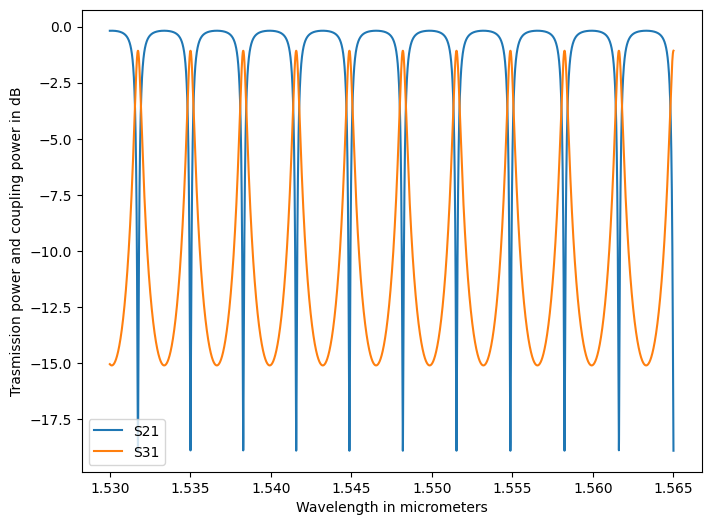

In [134]:
### We try to separate 3 wavelengths which are in the
### range of tunable lasers in the C-band (?)

lambda1 = 1.530
lambda2 = 1.547
lambda3 = 1.565

# They have these effect refractive indices according to fig 3a of
# https://opg.optica.org/oe/fulltext.cfm?uri=oe-32-18-31375&id=554605
# (as long as there are no sharp corners)

n1 = 2.465
n2 = 2.45
n3 = 2.435

# guesses for coupling strengths which are taken from fig 3 of
# https://opg.optica.org/directpdfaccess/45cdb5d6-73dd-4d89-bbe68b128695d1ae_196150/oe-18-5-5151.pdf?da=1&id=196150&seq=0&mobile=no
# for the minimum separation of the circular coupler of 200nm according to the design rules

a = 0.999
K1 = 0.3
K2 = 0.3
alpha = np.log(10) # 10dB
R = 30.3803 * 10 ** (-4) # optimal radius, see below

N = 10000
wavelength = np.linspace(lambda1, lambda3, N) * 10 ** (-4)
n_linear_interpolation = np.linspace(n1, n3, N)

plt.figure(figsize = (8,6))

plt.plot(wavelength * 10 ** 4, 10 * np.log10(np.abs(S21(a, K1, K2, alpha, R, n_linear_interpolation, wavelength))**2), label="S21")
plt.plot(wavelength * 10 ** 4, 10 * np.log10(np.abs(S31(a, K1, K2, alpha, R, n_linear_interpolation, wavelength))**2), label="S31")

plt.xlabel("Wavelength in micrometers")
plt.ylabel("Trasmission power and coupling power in dB")
plt.legend()
plt.show()

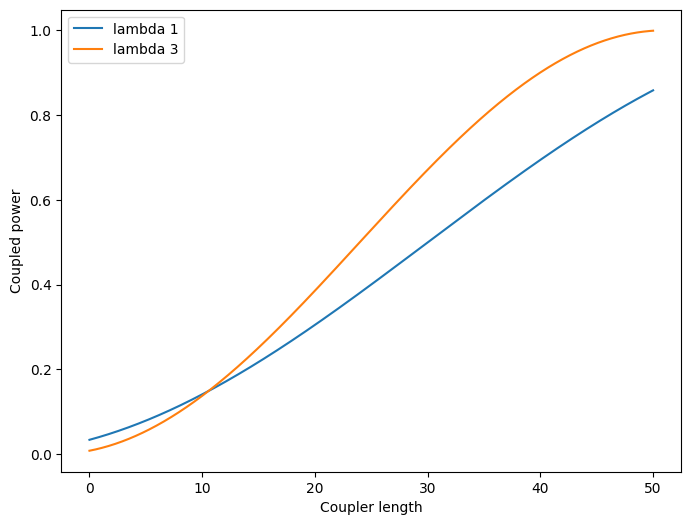

In [139]:
# Compute Coupler Length according to
# http://fib.intec.ugent.be/download/pub_4030.pdf
# Result: It should be longer than 30 micrometers (arbitrary cutoff...)

def coupled_power(kp, k0, L):
    return np.sin(kp * L + k0)**2

kp_1 = 0.020
k0_1 = 0.185

kp_3 = 0.029
k0_3 = 0.090

L_range = np.linspace(0, 50, 1000)

plt.figure(figsize=(8,6))

plt.plot(L_range, coupled_power(kp_1, k0_1, L_range), label="lambda 1")
plt.plot(L_range, coupled_power(kp_3, k0_3, L_range), label="lambda 3")

plt.xlabel("Coupler length")
plt.ylabel("Coupled power")
plt.legend()
plt.show()

Optimal R = 30.3803 micrometers


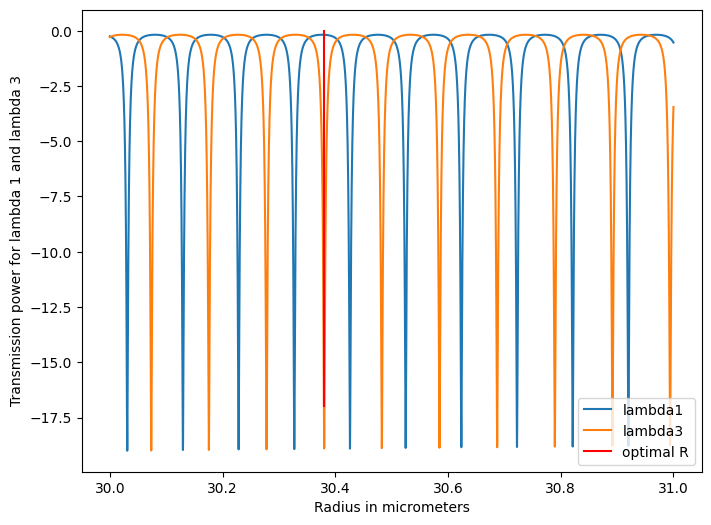

In [135]:
# Compute the optimal radius. It should be
# larger than 30 micrometers so that it has enough
# length to transmit to the ring at the contact point.

plt.figure(figsize=(8,6))

R_range = np.linspace(30 * 10**(-4), 31 * 10**(-4), 10000)
plt.plot(R_range * 10**4, 10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_range, n1, lambda1 * 10**(-4)))**2), label="lambda1")
plt.plot(R_range * 10**4, 10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_range, n3, lambda3 * 10**(-4)))**2), label="lambda3")

# Look for a point where lambda1 is fully transmitted and lambda3 is coupled onto the ring completely

R_check = np.linspace(30.3 * 10**(-4), 30.4 * 10**(-4), 10000)
R_optimal = min(R_check, key=lambda R: np.abs(S21(a, K1, K2, alpha, R, n3, lambda3 * 10**(-4))))
print(f"Optimal R = {R_optimal * 10**4:.4f} micrometers")

plt.plot([R_optimal * 10**4, R_optimal * 10**4], [0, -17], color="red", label="optimal R")

plt.xlabel("Radius in micrometers")
plt.ylabel("Transmission power for lambda 1 and lambda 3")
plt.legend()
plt.show()

In [136]:
# compute expected couplings

# for 1.31 and 0.98 micrometers
print(f"S21 for {lambda2:.2f} micrometers: {10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_optimal, n2, lambda2 * 10**(-4)))**2):.2f}dB")
print(f"S21 for {lambda3:.2f} micrometers: {10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_optimal, n3, lambda3 * 10**(-4)))**2):.2f}dB")
print(f"S31 for {lambda2:.2f} micrometers: {10 * np.log10(np.abs(S31(a, K1, K2, alpha, R_optimal, n2, lambda2 * 10**(-4)))**2):.2f}dB")
print(f"S31 for {lambda3:.2f} micrometers: {10 * np.log10(np.abs(S31(a, K1, K2, alpha, R_optimal, n3, lambda3 * 10**(-4)))**2):.2f}dB")

S21 for 1.55 micrometers: -0.26dB
S21 for 1.56 micrometers: -18.92dB
S31 for 1.55 micrometers: -13.48dB
S31 for 1.56 micrometers: -1.07dB


In [110]:
# compute sensitivity of expected couplings (very bad...)

# for 1.31 and 0.98 micrometers
error = 1*10**(-6)
print(f"With error of {error * 10**4} micrometers")
print(f"S21 for {lambda2:.2f} micrometers: {10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_optimal + error, n2, lambda2 * 10**(-4)))**2):.2f}dB")
print(f"S21 for {lambda3:.2f} micrometers: {10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_optimal + error, n3, lambda3 * 10**(-4)))**2):.2f}dB")
print(f"S31 for {lambda2:.2f} micrometers: {10 * np.log10(np.abs(S31(a, K1, K2, alpha, R_optimal + error, n2, lambda2 * 10**(-4)))**2):.2f}dB")
print(f"S31 for {lambda3:.2f} micrometers: {10 * np.log10(np.abs(S31(a, K1, K2, alpha, R_optimal + error, n3, lambda3 * 10**(-4)))**2):.2f}dB")

With error of 0.01 micrometers
S21 for 1.55 micrometers: -0.20dB
S21 for 1.56 micrometers: -1.60dB
S31 for 1.55 micrometers: -14.74dB
S31 for 1.56 micrometers: -6.16dB


In [111]:
print(f"Optimal R = 30.3803 micrometers, circumfrence = {2 * np.pi * 30.3803:.4f} micrometers.")

Optimal R = 30.3803 micrometers, circumfrence = 190.8851 micrometers.


In [129]:
# We are using 4 Euler bends which has length s = R0 * sqrt(2 alpha) instead of a circle.
# According to (3) of https://opg.optica.org/oe/fulltext.cfm?uri=oe-27-22-31394&id=422321 we have:
# => 4 R0 * sqrt(2 pi/2) = 2 pi * R_optimal => R0 = 1/2 * R_optimal * sqrt(pi)

print(f"The optimal Euler bend curvature radius is R0 = {1/2 * R_optimal * np.sqrt(np.pi) * 10**4:.4f} micrometers.")

The optimal Euler bend curvature radius is R0 = 26.9238 micrometers.


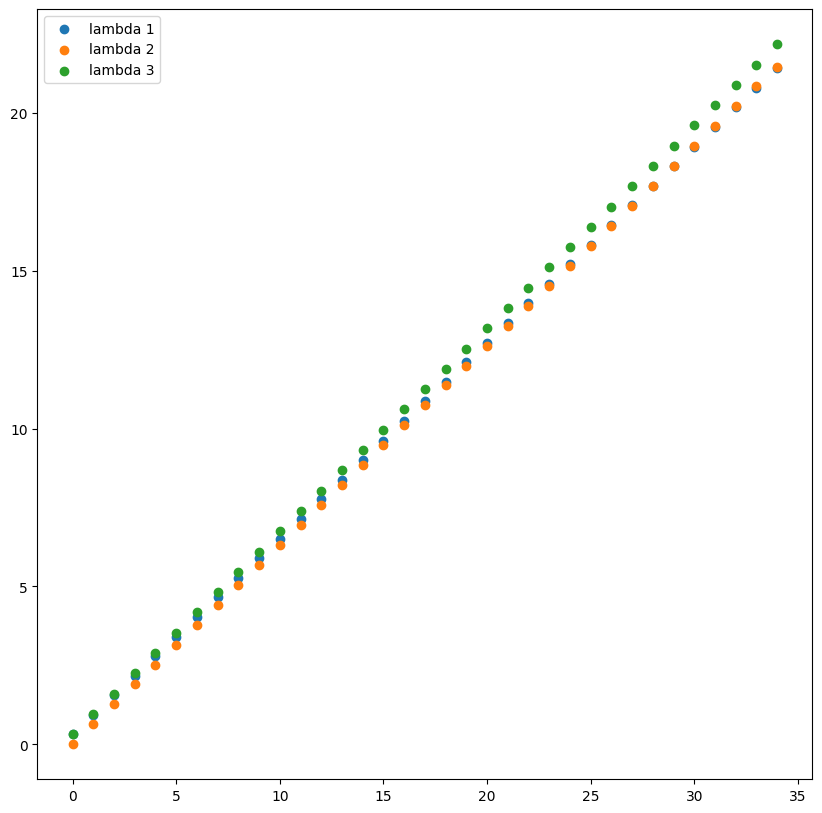

In [145]:
# The Mach-Zehnder interferometer should separate lambda1 and lambda3 from lambda2.
# According to "Silica Based Integrated Optics Mach-Zehnder Multi/Demultiplexer Family with Channel
# spacing of 0.01-250nm" (1-3) the output 1 of a Mach-Zehnder has power cos^2(Kf) and the other sin^2(Kf)
# where K = n pi Delta_L / c. Thus the condition that lambda2 is at one output and the other waves are
# at the other is that there are m1, m2, m3 such that
#
# Delta_L = (m1 + 1/2) * lambda1 / n1
# Delta_L = (m2) * lambda2 / n2
# Delta_L = (m3 + 1/2) * lambda3 / n3
#
# => The task is to find m1, m2, m3 such that all of these numbers are as equal as possible.

range_m = np.arange(0, 35)
delta_l_1 = lambda1 / n1 * (range_m + 1/2)
delta_l_2 = lambda2 / n2 * range_m
delta_l_3 = lambda3 / n3 * (range_m + 1/2)

plt.figure(figsize=(10,10))
plt.scatter(range_m, delta_l_1, label="lambda 1")
plt.scatter(range_m, delta_l_2, label="lambda 2")
plt.scatter(range_m, delta_l_3, label="lambda 3")

plt.legend()
plt.show()

In [101]:
# The best reasonable values are for m3 = 28 and m1 = m2 = 29

print(delta_l_1[4])
print(delta_l_2[4])
print(delta_l_3[3])

18.310344827586206
18.311428571428568
18.31724845995893


In [146]:
# Take the middle values as the optimal one:

print("Mach Zehnder optimal: Delta_L = 18.3114")

Mach Zehnder optimal: Delta_L = 18.3114
